In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/ProyectoAvesv06/Imagenes_Modelo_v02'|wc -l

10


In [ ]:
!ls '/content/drive/MyDrive/ProyectoAvesv06/Imagenes_Modelo_v02/Nyctanassa violacea'|wc -l

652


In [ ]:
# importamos os para trabajar con directorios
import os
# lista patra guardar el número de archivos por carpeta:
contador_imagenes={}
# Ruta de la carpeta principal:
ruta_archivos='/content/drive/MyDrive/ProyectoAvesv06/Imagenes_Modelo_v02'

#Iteramos sobre cada subcarpeta
for carpeta in os.listdir(ruta_archivos):
  # os.path.join() is used to create the full path to that item by joining the ruta_archivos path with the carpeta name.
  rutas_carpeta=os.path.join(ruta_archivos,carpeta)
  #devuelve el nombre de la carpeta con el número de items dentro de cada una de las carpetas en forma de diccionario
  contador_imagenes[carpeta]=len(os.listdir(rutas_carpeta))
#
for especie,cantidad in contador_imagenes.items():
  print(f"{especie}: {cantidad} imágenes")


Ardea alba: 812 imágenes
Egretta tricolor: 621 imágenes
Anas crecca: 516 imágenes
Buteogallus anthracinus: 556 imágenes
Chloroceryle americana: 534 imágenes
Oxyura jamaicensis: 583 imágenes
Ardea herodias: 514 imágenes
Cochlearius cochlearius: 509 imágenes
Fulica americana: 523 imágenes
Nyctanassa violacea: 652 imágenes


In [ ]:
contador_imagenes

{'Ardea alba': 812,
 'Egretta tricolor': 621,
 'Anas crecca': 516,
 'Buteogallus anthracinus': 556,
 'Chloroceryle americana': 534,
 'Oxyura jamaicensis': 583,
 'Ardea herodias': 514,
 'Cochlearius cochlearius': 509,
 'Fulica americana': 523,
 'Nyctanassa violacea': 652}

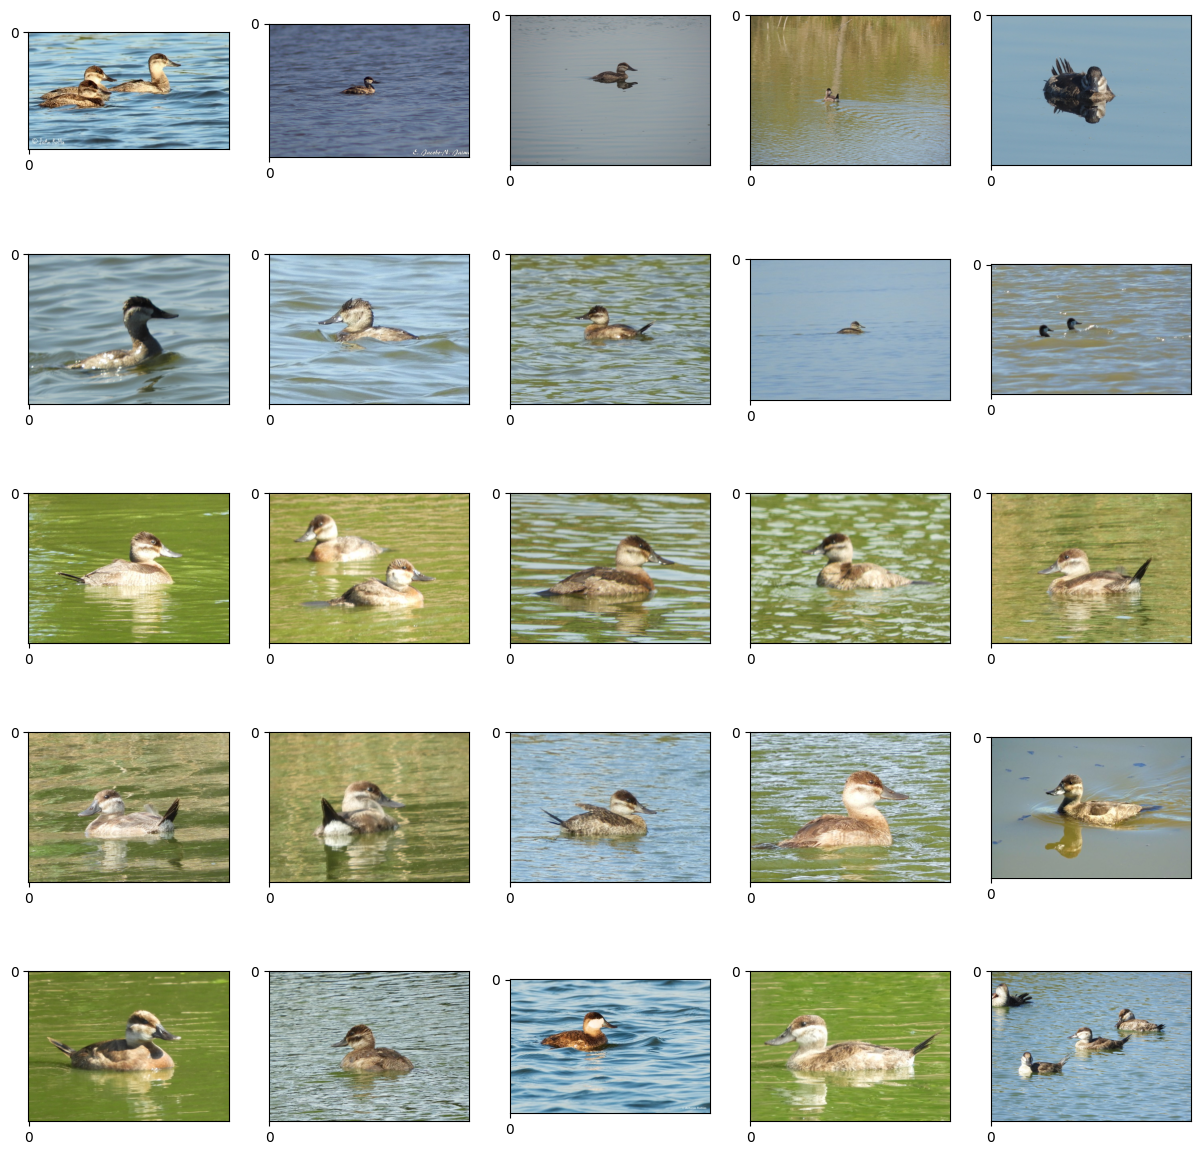

In [ ]:
#Muestra de las imágenes a usar
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Ajuste del tamaño del gráfico
plt.figure(figsize=(15, 15))

carpeta= '/content/drive/MyDrive/ProyectoAvesv06/Imagenes_Modelo_v02/Oxyura jamaicensis'
imagenes = os.listdir(carpeta)
#obtenemos las últimas 25 imágenes del esta clase
#ennumerate nos da tanto el índice (i) como el valor (nomre_img) de cada uno de los items
for i, nombreimg in enumerate(imagenes[ : 25]):
  #para cada imagen se construye la ruta completa carpeta + nombreimg
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.subplot(5, 5, i+1)
  plt.xticks([False])
  plt.yticks([False])
  plt.imshow(imagen)

In [ ]:
#Copiado de las imágenes
import shutil
import random
carpeta_fuente= '/content/drive/MyDrive/ProyectoAvesv06/Imagenes_Modelo_v02'
carpeta_destino= '/content/drive/MyDrive/ProyectoAvesv06/dataset/Imagenes_Modelo_500_v02'

#Debido a que queremos copiar de manera aleatoria 500 imágenes de cada carpeta
#no podemos usar shitil.copytree ya que esto copiará todo tal cual
# Primero se itera por cada carpeta dentro de ImagenesModelo
for carpetaEspecie in os.listdir(carpeta_fuente):
  ruta_especie_origen=os.path.join(carpeta_fuente,carpetaEspecie)
  ruta_especie_destino=os.path.join(carpeta_destino,carpetaEspecie)

  #creamos las subcarpetas destino
  # como el !mkdir
  os.makedirs(ruta_especie_destino,exist_ok=True)

  # extracción de las imagenes de subcarpeta de la ruta de origen para cada especie
  #imagenes=os.listdir(carpeta_fuente)
  imagenes=os.listdir(ruta_especie_origen)

  #aquí vamos a seleccionar 500 imágenes de manera aleatoria de cada una de las subcarpetas
  seleccion=random.sample(imagenes,min(500,len(imagenes)))

  #copiado de las imágenes seleccionadas
  for i in seleccion:
    shutil.copy(os.path.join(ruta_especie_origen,i),ruta_especie_destino)







In [ ]:
ruta_especie_destino

'/content/drive/MyDrive/ProyectoAvesv06/dataset/Imagenes_Modelo_500_v02/Nyctanassa violacea'

In [ ]:
#Verificamos nuevamente que en cada carpeta existan 500 imágenes
# lista patra guardar el número de archivos por carpeta:
contador_imagenes={}
# Ruta de la carpeta principal:
ruta_archivos='/content/drive/MyDrive/ProyectoAvesv06/dataset/Imagenes_Modelo_500_v02'

#Iteramos sobre cada subcarpeta
for carpeta in os.listdir(ruta_archivos):
  # os.path.join() is used to create the full path to that item by joining the ruta_archivos path with the carpeta name.
  rutas_carpeta=os.path.join(ruta_archivos,carpeta)
  #devuelve el nombre de la carpeta con el número de items dentro de cada una de las carpetas en forma de diccionario
  contador_imagenes[carpeta]=len(os.listdir(rutas_carpeta))
#
for especie,cantidad in contador_imagenes.items():
  print(f"{especie}: {cantidad} imágenes")

Ardea alba: 500 imágenes
Egretta tricolor: 500 imágenes
Anas crecca: 500 imágenes
Buteogallus anthracinus: 500 imágenes
Chloroceryle americana: 500 imágenes
Oxyura jamaicensis: 500 imágenes
Ardea herodias: 500 imágenes
Cochlearius cochlearius: 500 imágenes
Fulica americana: 500 imágenes
Nyctanassa violacea: 500 imágenes


In [ ]:
#Realizamos el aumento de datos
#Aplicamos filtros para tener imágenes diferentes
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#creamos el dataset geneador
datagen= ImageDataGenerator(
    rescale=1./255, #This parameter scales the pixel values of the images from the original range of 0-255 to 0-1
    rotation_range=10, #to be randomly rotated by up to 10 degrees
    width_shift_range=0.15,#shifted horizontally by up to 15% of their total width
    shear_range=0.2,#random shearing transformations to the images, distorting them along an axis #valores decimales
    zoom_range=[0.7,1.3], #the zoom factor will be between 0.7 (zoom out) and 1.3 (zoom in).
    horizontal_flip=True,
    brightness_range=[0.8,1.2], #diferentes condiciones de brillo
    validation_split=0.2 #This specifies that 20% of the data will be reserved for validation.

)

In [ ]:
#Ruta de las imágenes organizadas por carpeta
ruta_dataset='/content/drive/MyDrive/ProyectoAvesv06/dataset/Imagenes_Modelo_500_v02'
#creación del dataset de entrenamiento
datagen_entrenamiento=datagen.flow_from_directory(
    ruta_dataset,
    target_size=(224,224),#Resizes all images to 224x224 pixels
    batch_size=32,#Specifies the number of images to yield in each batch. This is the number of samples that will be propagated through the network at each training step.
    shuffle=True, #Shuffles the order of the images in each epoch. This helps to prevent the model from learning the order
    subset='training',
)
#creación del dataset de validación/prueba
datagen_validacion=datagen.flow_from_directory(
    ruta_dataset,
    target_size=(224,224),
    batch_size=32,
    shuffle=False,
    subset='validation',
)

Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


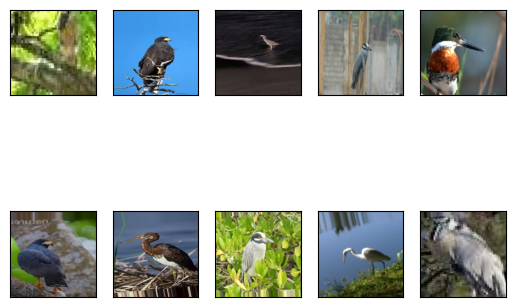

In [ ]:
for imagen, etiqueta in datagen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

####Comenzamos con el modelo de Transferencia de Aprendizaje
#Arquitectura Mobilenet_v2
#### Características:
#####

In [ ]:
#importamos las librerias necesarias
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilnetv2 = hub.KerasLayer(url, input_shape=(224,224,3))
mobilnetv2.trainable=False
# Define una función con nombre que envuelve la llamada a mobilnetv2
#def mobilenetv2_layer(x):
   #return mobilnetv2(x)

modelo = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    #tf.keras.layers.Lambda(mobilenetv2_layer),
    tf.keras.layers.Lambda(lambda x:mobilnetv2(x)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
modelo.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_9 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compilar el modelo
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
#Entrenamiento del modelo
epocas= 15
historial = modelo.fit(
    datagen_entrenamiento,
    validation_data = datagen_validacion,
    epochs=epocas,
    batch_size=32
)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 127s 955ms/step - accuracy: 0.4841 - loss: 1.5766 - val_accuracy: 0.6970 - val_loss: 0.8594
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 96s 768ms/step - accuracy: 0.8088 - loss: 0.5601 - val_accuracy: 0.7620 - val_loss: 0.6859
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 97s 777ms/step - accuracy: 0.8520 - loss: 0.4384 - val_accuracy: 0.7440 - val_loss: 0.7404
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 787ms/step - accuracy: 0.8577 - loss: 0.4113 - val_accuracy: 0.7670 - val_loss: 0.6513
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 783ms/step - accuracy: 0.8631 - loss: 0.3832 - val_accuracy: 0.7870 - val_loss: 0.6530
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 97s 780ms/step - accuracy: 0.8698 - loss: 0.3575 - val_accuracy: 0.7840 - val_loss: 0.6244
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 788ms/step - accuracy: 0.8844 - loss: 0.3130 - val_accuracy: 0.7840 - val_loss: 0.6501
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 99s 788ms/step - accuracy: 0.8968 - loss: 

In [ ]:
modelo.save("AvesMarismasNacionalesv06_classifier.h5")

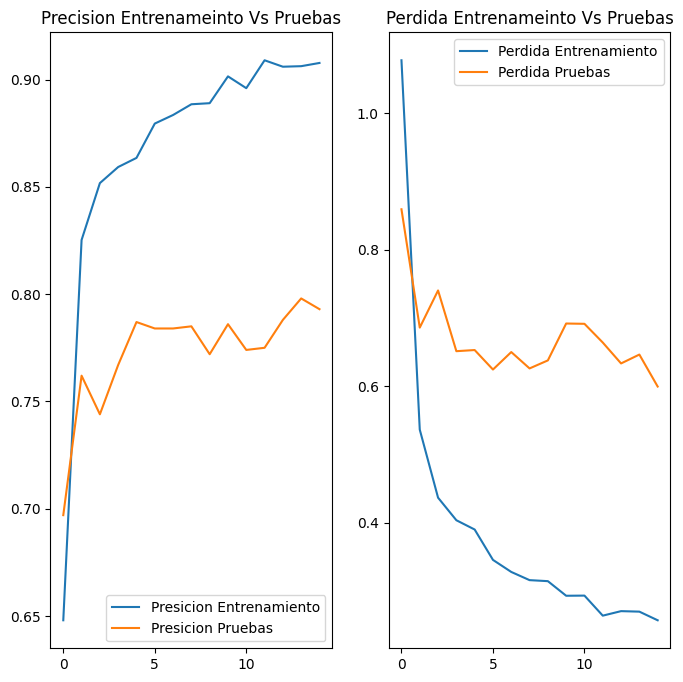

In [ ]:
import matplotlib.pyplot as plt
#graficar la preccion
acc = historial.history["accuracy"]
val_acc =historial.history["val_accuracy"]

loss = historial.history["loss"]
val_loss = historial.history["val_loss"]

rango_epocas = range(epocas)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, acc, label="Presicion Entrenamiento")
plt.plot(rango_epocas, val_acc, label="Presicion Pruebas")
plt.legend(loc="lower right")
plt.title("Precision Entrenameinto Vs Pruebas")

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, loss, label="Perdida Entrenamiento")
plt.plot(rango_epocas, val_loss, label="Perdida Pruebas")
plt.legend(loc="upper right")
plt.title("Perdida Entrenameinto Vs Pruebas")
plt.show()

In [ ]:
def verificar_integridad_modelo(ruta_modelo):
    try:
        # Cargar el modelo
        modelo = tf.keras.models.load_model(ruta_modelo, safe_mode=False)
        print(f"Modelo cargado correctamente desde {ruta_modelo}")

        # Crear datos de prueba aleatorios con la forma esperada (ejemplo 224x224x3)
        entrada_prueba = np.random.random((1, 224, 224, 3))

        # Realizar una predicción para comprobar que el modelo funciona
        salida = modelo.predict(entrada_prueba)
        print("Predicción de prueba realizada con éxito. Forma de salida:", salida.shape)

        return True
    except Exception as e:
        print(f"Error al cargar o usar el modelo: {e}")
        return False

In [ ]:
# Usa la función con la ruta de tu archivo
verificar_integridad_modelo("/content/AvesMarismasNacionalesv05_classifier.h5")

Error al cargar o usar el modelo: Could not locate function 'mobilenetv2_layer'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'mobilenetv2_layer', 'registered_name': 'function'}


False